In [1]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import mplhep
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
from scipy.optimize import curve_fit
from utils.components import unique_name_ext_re
mplhep.style.use(["LHCbTex2"])
plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [2]:
file = uproot.open(
    "/work/cetin/LHCb/reco_tuner/data/tracking_losses_ntuple_B_thesis.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
electrons = allcolumns[(allcolumns.isElectron) & (allcolumns.fromB)]

ak.num(electrons, axis=0)
# ak.count(found, axis=None)

50501

In [3]:
# electrons.type.show()

In [4]:
cut_prop: bool = electrons.p_end_velo > 0  # 3e3
found = electrons[~electrons.lost]
lost = electrons[electrons.lost]

eloss_found = (found["p"] - found["p_end_scifi"]) / found["p"]
eloss_lost = (lost["p"] - lost["p_end_scifi"]) / lost["p"]

eloss = (electrons["p"] - electrons["p_end_scifi"]) / electrons["p"]
eloss_magnet_found = ak.to_numpy(
    (found["p_end_velo"] - found["p_end_scifi"]) / found["p_end_velo"]
)
eloss_magnet_lost = ak.to_numpy(
    (lost["p_end_velo"] - lost["p_end_scifi"]) / lost["p_end_velo"]
)

In [5]:
eloss_velo_found = (found["p"] - found["p_end_velo"]) / found["p"]
eloss_velo_lost = (lost["p"] - lost["p_end_velo"]) / lost["p"]

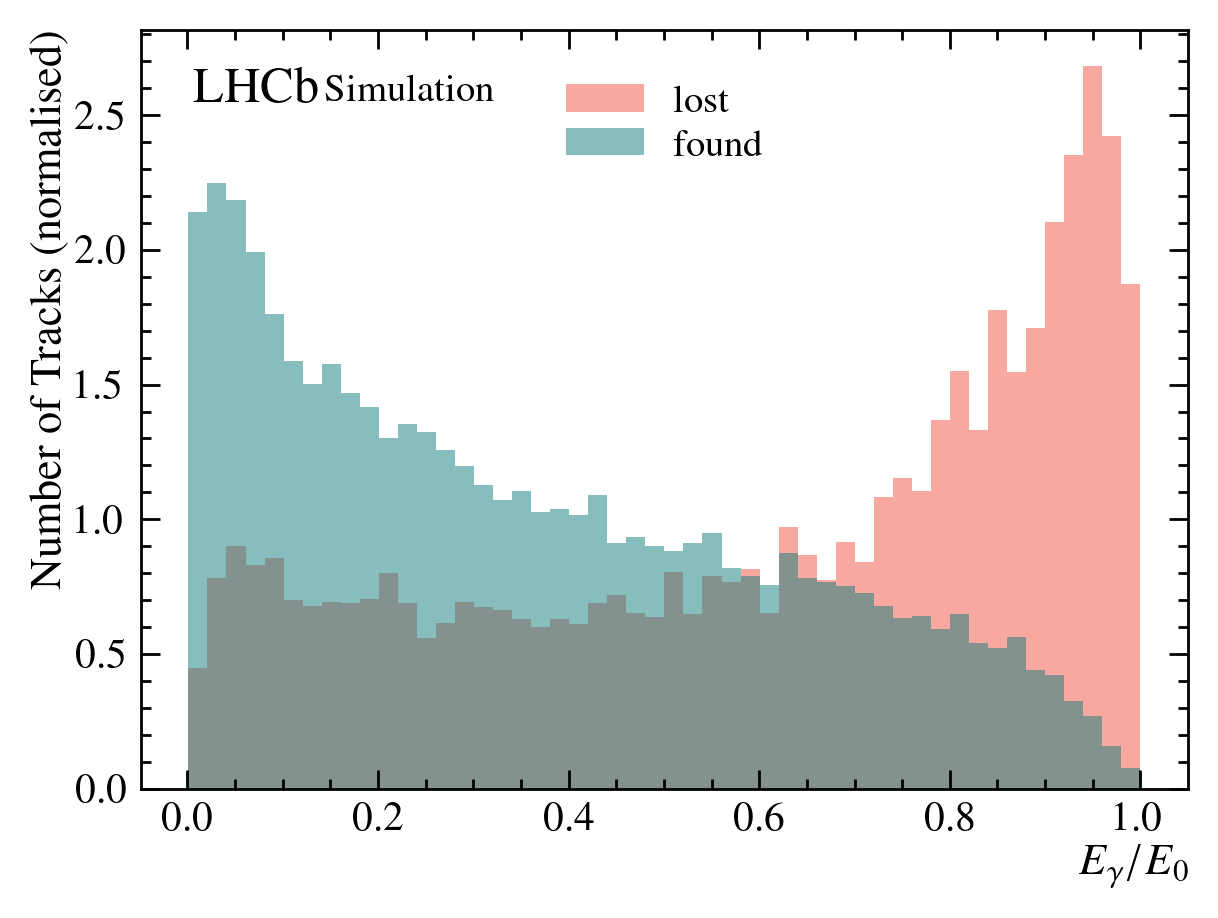

In [6]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")
plt.legend(loc="upper center")
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/emitted_energy_beginVelo2endT.pdf",
#     format="PDF",
# )

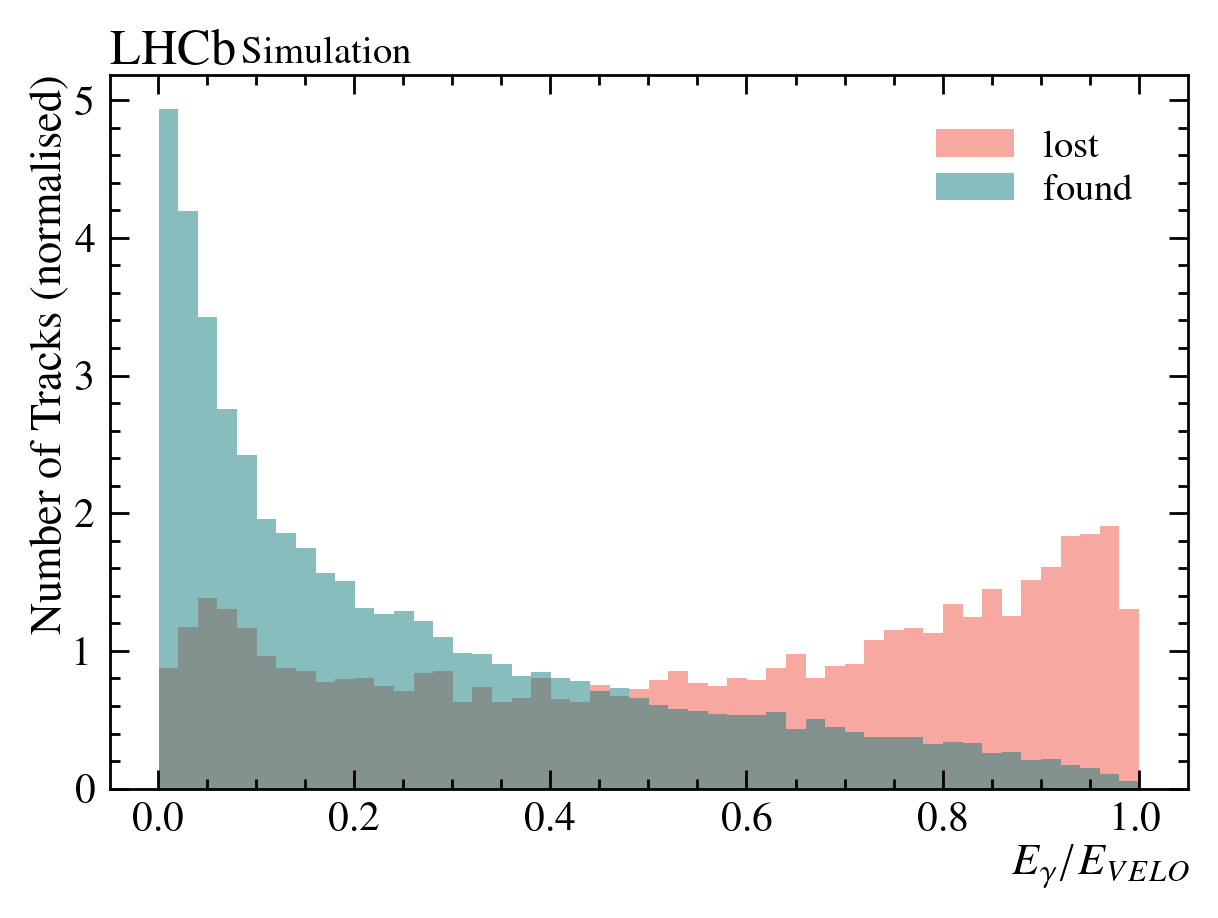

In [7]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_magnet_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_magnet_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_{VELO}$")
plt.ylabel("Number of Tracks (normalised)")
# plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/emitted_energy_endVelo2endT.pdf",
#     format="PDF")

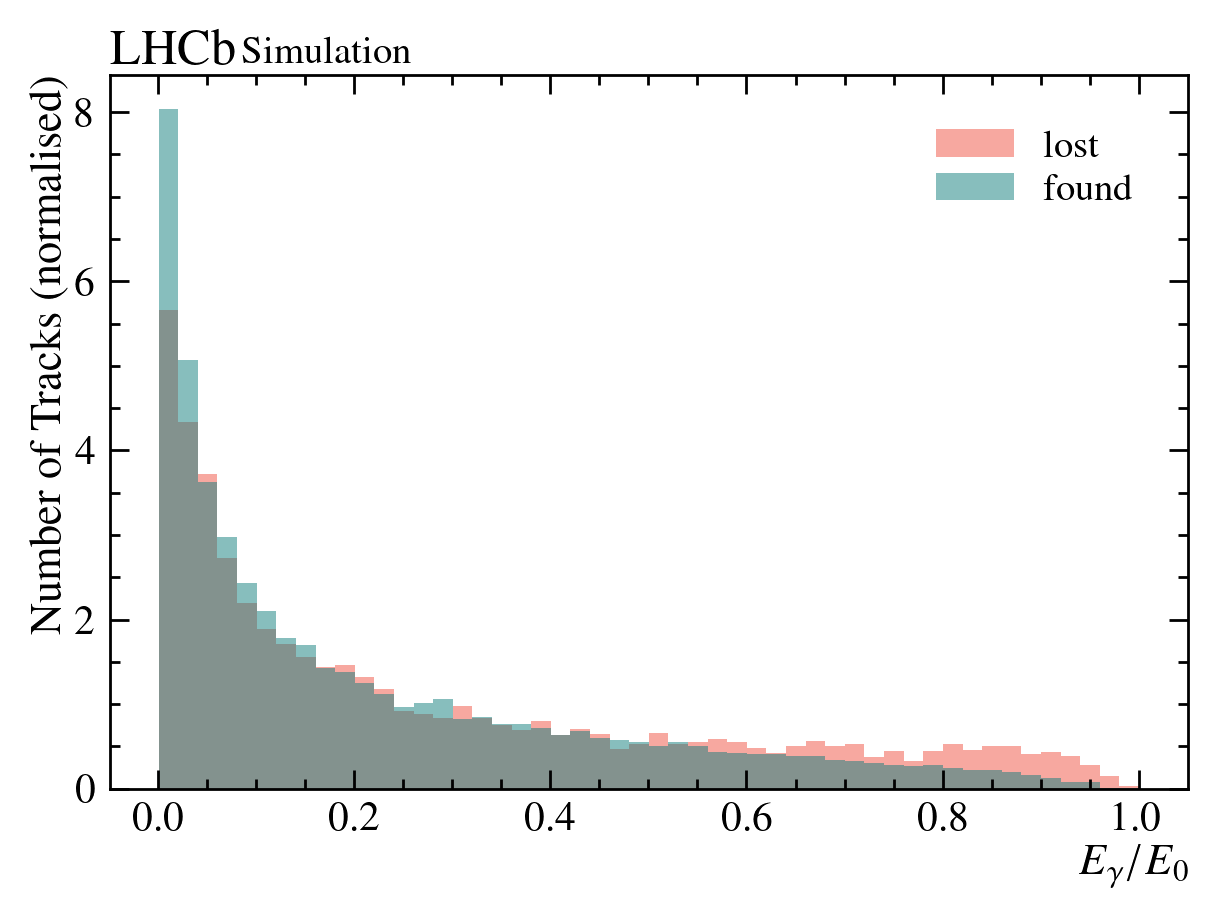

In [8]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_velo_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_velo_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_0$")
# plt.ylabel("a.u.")
plt.ylabel("Number of Tracks (normalised)")

# plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/emitted_energy_beginVelo2endVelo.pdf",
#     format="PDF",
# )

In [9]:
### --- ### above should be correct

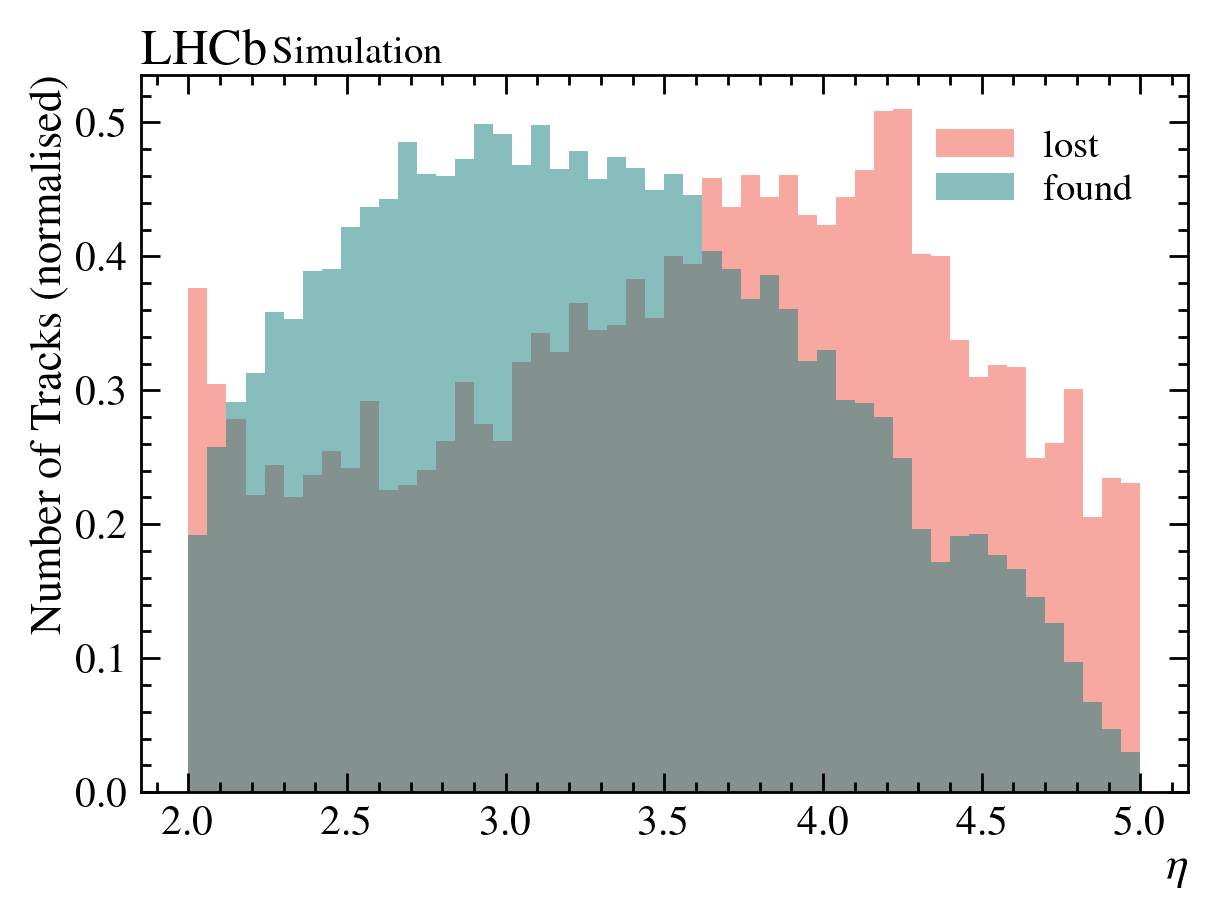

In [12]:
nbins = 50
plt.hist(
    ak.to_numpy(lost["eta"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[2, 5],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(found["eta"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[2, 5],
)
# plt.xlim(2, 5)
plt.xlabel(r"$\eta$")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
# plt.show()
plt.savefig(
    "/work/cetin/Projektpraktikum/thesis/eta_found_lost.pdf",
    format="PDF",
)

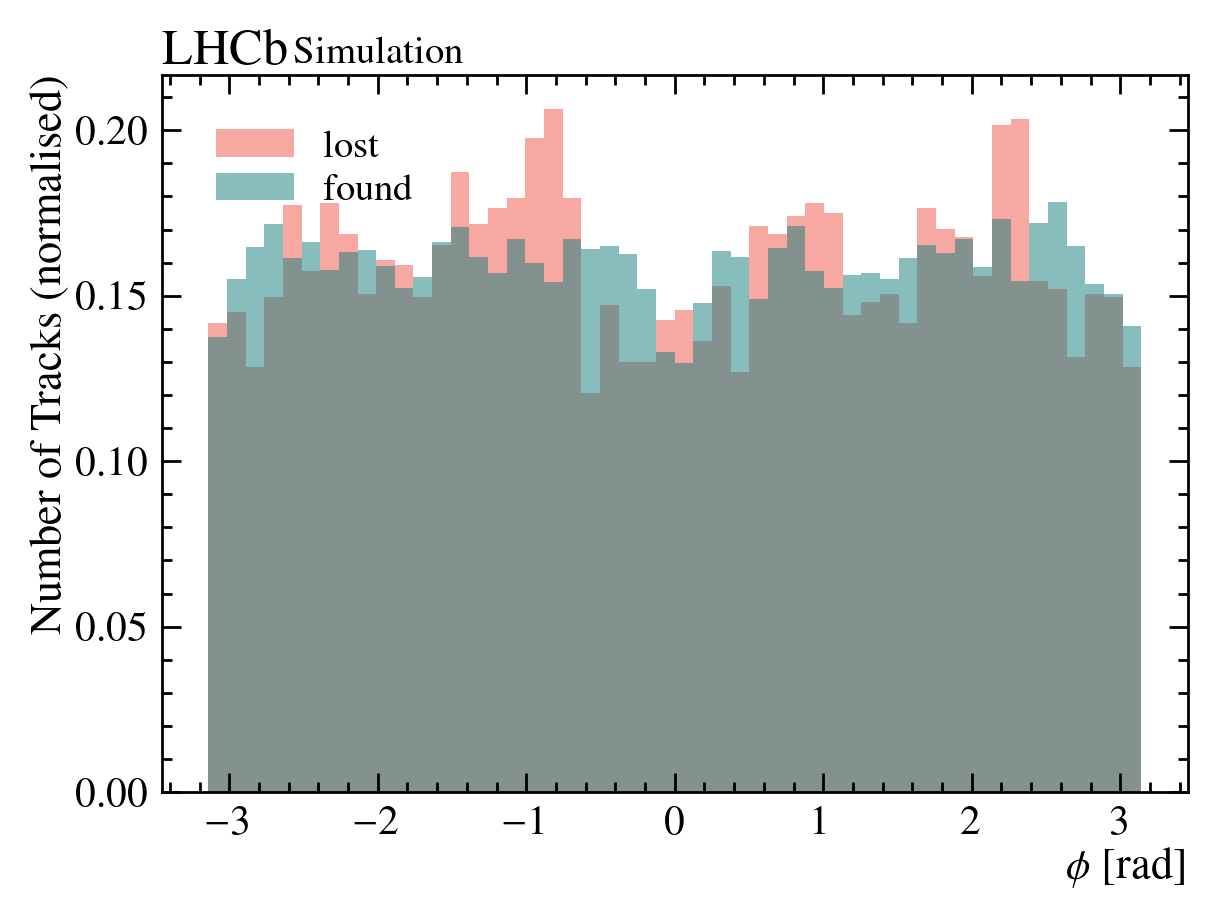

In [11]:
nbins = 50
plt.hist(
    ak.to_numpy(lost["phi"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[-3.142, 3.142],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(found["phi"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[-3.142, 3.142],
)
# plt.xlim(2, 5)
plt.xlabel(r"$\phi$ [rad]")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/phi_found_lost.pdf",
#     format="PDF",
# )

In [13]:
# magnet kick position
input_tree = uproot.open(
    {
        "/work/cetin/Projektpraktikum/tracking_losses_ntuple_B_zmag.root": "PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
    }
)
array = input_tree.arrays()
array = array[(array.isElectron) & (array.fromB)]
stretch_factor = ak.num(array[array.lost], axis=0) / ak.num(array[~array.lost], axis=0)
stretch_factor

0.24996287312509283

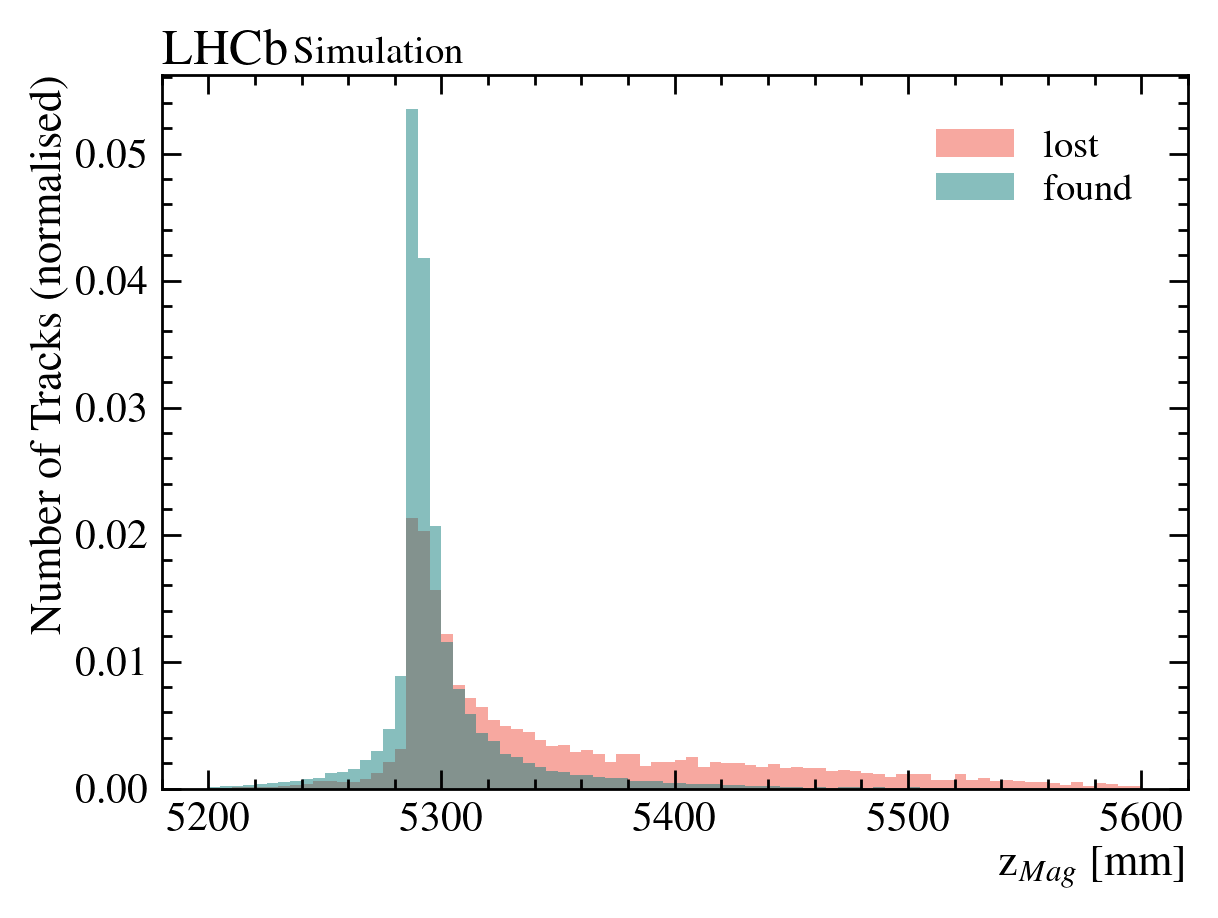

In [15]:
xmin: float = 5200
xmax: float = 5600

fig = plt.figure()
plt.hist(
    array[array.lost]["match_zmag"],
    bins=80,
    range=[xmin, xmax],
    color="#F05342",
    alpha=0.5,
    label="lost",
    density=True,
)
plt.hist(
    array[~array.lost]["match_zmag"],
    bins=80,
    range=[xmin, xmax],
    color="#107E7D",
    alpha=0.5,
    label="found",
    density=True,
)
plt.xlabel(r"z$_{Mag}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
# plt.show()
plt.savefig("/work/cetin/Projektpraktikum/thesis/match_zmag_lost_found.pdf",
            format="PDF")

brem vtx 2d hists in trackinglosses_energy notebook
